In [58]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import pandas as pd
import io
import requests
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['grid.color'] = 'b'
plt.style.use(['dark_background'])

In [2]:
def read_from_url(dataset : str) -> (pd.DataFrame):
    train_data = pd.read_csv(f'https://pages.mini.pw.edu.pl/~teisseyrep/TEACHING/AML/Project2/{dataset}_train.data', sep = ' ', header=None).iloc[:,:-1]
    valid_data = pd.read_csv(f'https://pages.mini.pw.edu.pl/~teisseyrep/TEACHING/AML/Project2/{dataset}_valid.data', sep = ' ', header=None).iloc[:,:-1]
    train_labels = pd.read_csv(f'https://pages.mini.pw.edu.pl/~teisseyrep/TEACHING/AML/Project2/{dataset}_train.labels', header=None)

    return train_data, train_labels, valid_data

In [3]:
X, labels, valid = read_from_url('artificial')

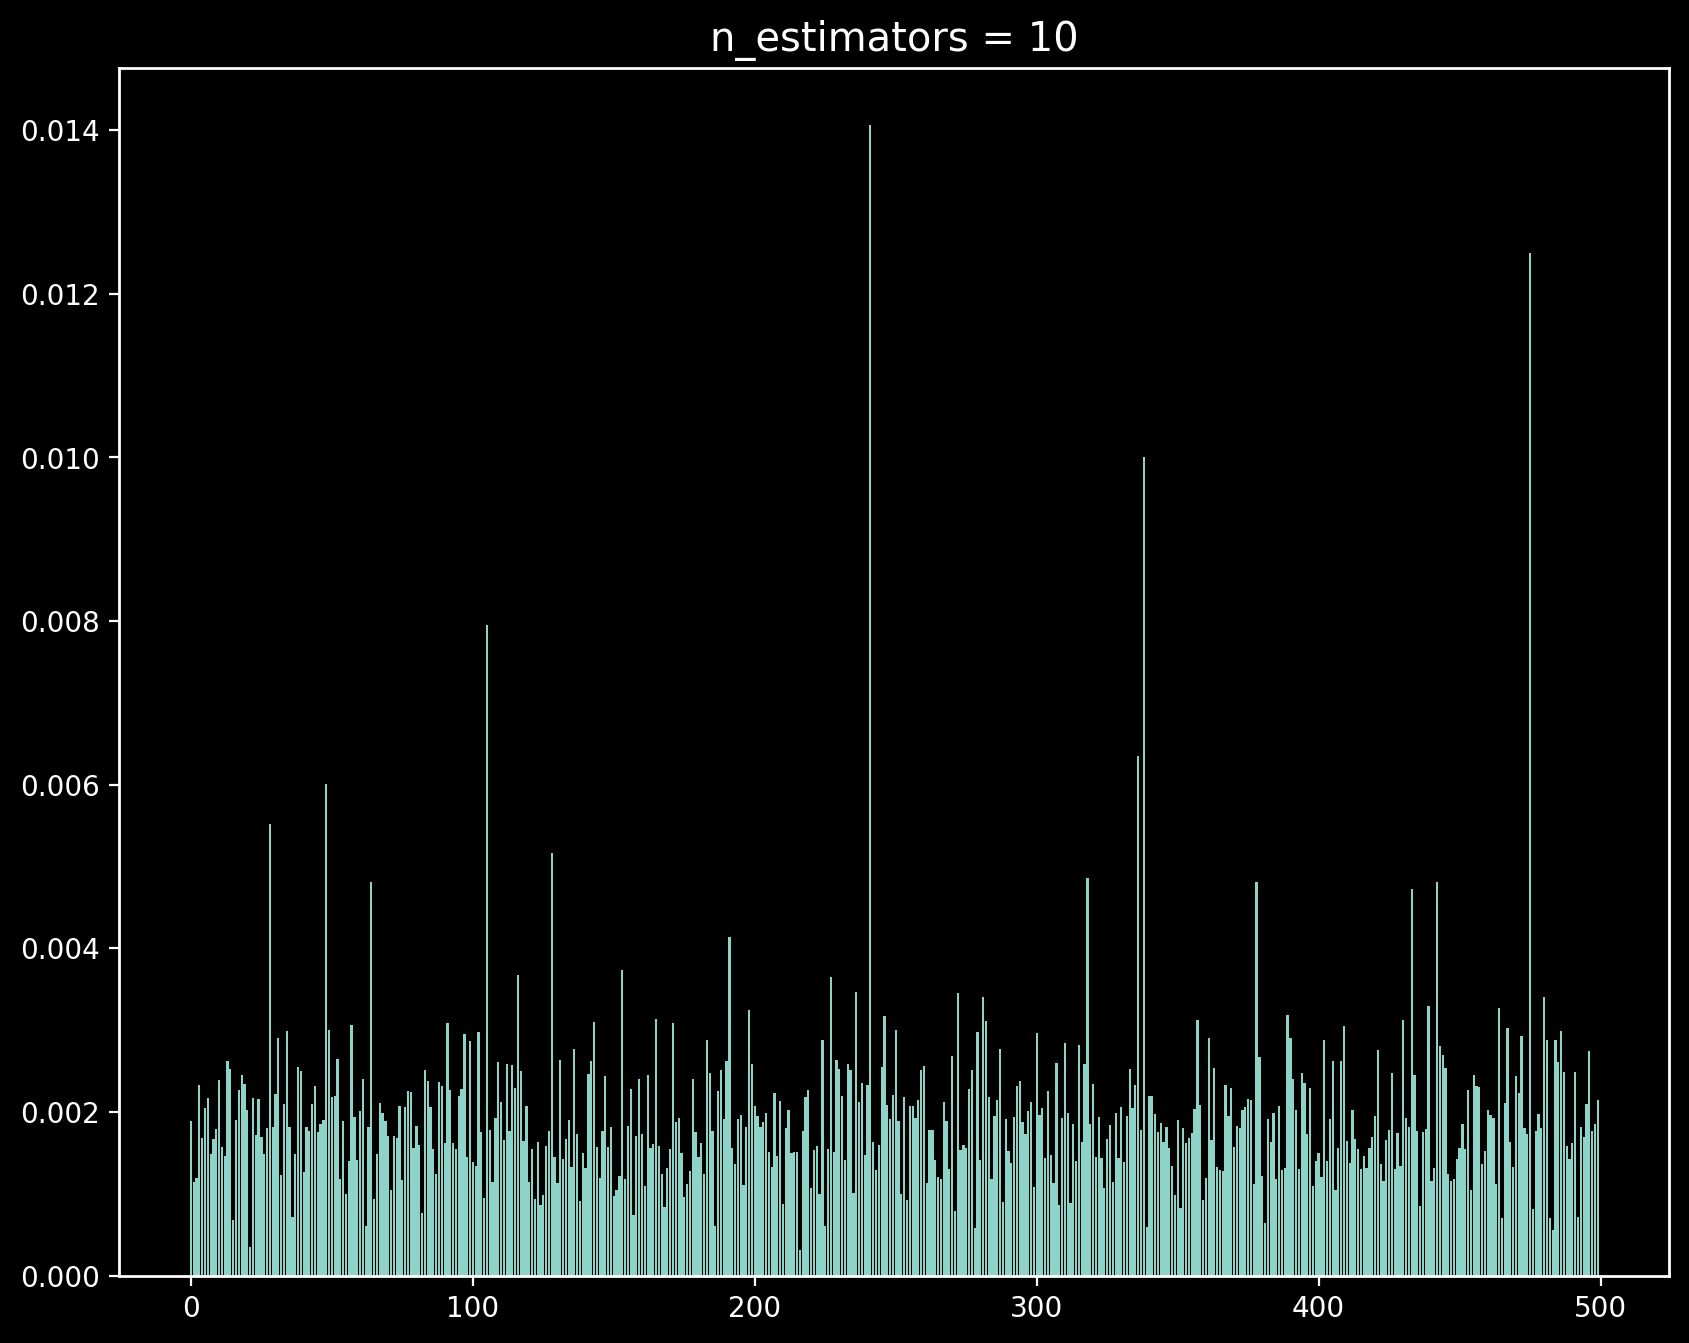

In [62]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

y = labels.values.ravel()
clf = ExtraTreesClassifier(n_estimators=10)
clf = clf.fit(X, y)

N = len(clf.feature_importances_)

fig, ax=plt.subplots()
ax.grid(False)

plot = ax.bar(x=range(0,N),height=clf.feature_importances_)
ax.set_title('n_estimators = 10')

def animate(i):
    y = labels.values.ravel()
    clf = ExtraTreesClassifier(n_estimators=i+1)
    clf = clf.fit(X, y)

    for rect, weight in zip(plot, clf.feature_importances_):
        rect.set_height(weight)
        ax.set_title(f'n_estimators = {i+1}')
         
anim = animation.FuncAnimation(fig,animate,frames=20,interval=1,blit=False,repeat=False)

In [ ]:
anim.save('ExtraTreesClassifier.mp4',writer=animation.FFMpegWriter(fps=5))

In [65]:
model = SelectFromModel(clf, prefit=True)
selected_features = model.transform(X)
selected_features.shape

(2000, 197)